In [98]:
#Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud

In [99]:
#Cargamos los datasets
c_courses = pd.read_csv("Data\Coursera_courses.csv")
c_reviews = pd.read_csv("Data\Coursera_reviews.csv")
edx = pd.read_csv("Data\edx_courses.csv")
udemy = pd.read_csv("Data\\udemy_courses.csv", encoding="utf-8")

Nos proporcionan 4 datasets de tres compañías del sector MOOC (Massive Open Online Courses, por sus siglas en inglés): 1 de Udemy, 2 de Coursera y 1 de EDX.
Algunos datasets por las características de sus variables nos permiten establecer relaciones y comparaciones entre ellos. Otros  tienen variables que no tienen el resto por lo que los resultados estarán limitados a ese dataset. Pero todos proporcionan datos valiosos sobre los MOOCs y su modelo de negocio a partir de los cuales realizaremos el siguiente análisis exploratorio. 

Realizaremos primero algunas transformaciones necesarias para poder trabajar con los datasets

In [100]:
# Convertir la columna "published_timestamp" del dataset Udemy al tipo de dato de fecha
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

# Extraer el año, mes y día en columnas separadas "year", "month", "day"
udemy['year'] = udemy['published_timestamp'].dt.year
udemy['month'] = udemy['published_timestamp'].dt.month
udemy['day'] = udemy['published_timestamp'].dt.day

In [101]:
#Agregamos la columna price_numeric al dataset EDX

# Extraer los valores numéricos después del símbolo "$" en la columna "price" y convertirlos a tipo float
edx['price_numeric'] = edx['price'].str.extract(r'\$(\d+(?:\.\d+)?)').astype(float)

In [102]:
# Eliminar la coma de los valores en la columna "n_enrolled" y convertir su tipo de dato a enteros
edx['n_enrolled'] = edx['n_enrolled'].fillna('0').str.replace(',', '').astype(int)

In [103]:
# Eliminar los duplicados del dataset c_reviews
c_reviews = c_reviews.drop_duplicates()

In [104]:
# Convertir la columna "date_reviews" al formato de fecha
c_reviews['date_reviews']= pd.to_datetime(c_reviews['date_reviews'])

# Extraer el año de la columna "date_reviews" y agregarlo como una nueva columna "year"
c_reviews['year'] = c_reviews['date_reviews'].dt.year

In [105]:
## Análisis exploratorio de datos (EDA)

In [106]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
 12  year                

In [107]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016,12,13


C:\Users\YURI\AppData\Local\Temp\ipykernel_10196\521008868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = udemy.corr()


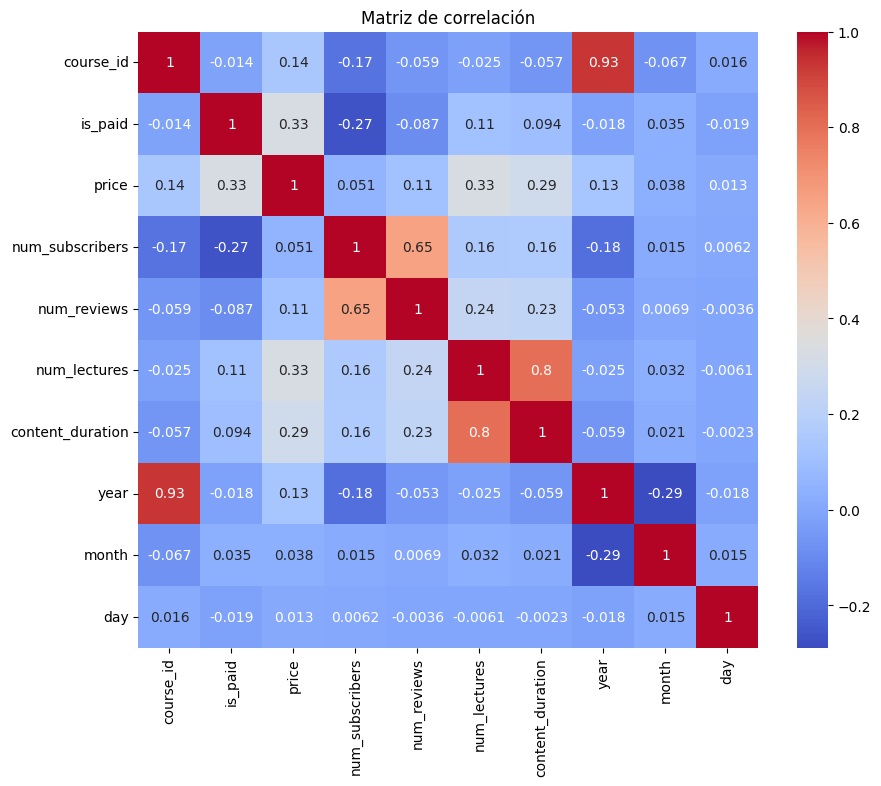

In [108]:
#Creamos una matriz de correlación
correlation_matrix = udemy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Ordenamos la correlación de las variables de mayor a menor.

In [109]:
# Obtenemos la cantidad de variables en la matriz de correlación
num_variables = correlation_matrix.shape[0]

# Crea una lista para almacenar las variables con mayor correlación
top_correlated_variable_names = []

# Recorre cada variable en la matriz de correlación
for i in range(num_variables):
    for j in range(i+1, num_variables):
        # Obtiene la correlación entre las variables i y j
        correlation = correlation_matrix.iloc[i, j]
        # Agrega las variables con su correlación a la lista
        top_correlated_variable_names.append((correlation, correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Ordena la lista por el valor absoluto de la correlación en orden descendente
top_correlated_variable_names.sort(reverse=True)

# Imprime las variables con mayor correlación
for correlation, variable1, variable2 in top_correlated_variable_names:
    print(f"Correlación: {correlation}, Variables: {variable1} - {variable2}")

Correlación: 0.9331511432473478, Variables: course_id - year
Correlación: 0.8016470509890067, Variables: num_lectures - content_duration
Correlación: 0.6499455391108038, Variables: num_subscribers - num_reviews
Correlación: 0.33016044816281165, Variables: price - num_lectures
Correlación: 0.32851293069364407, Variables: is_paid - price
Correlación: 0.29344961990154855, Variables: price - content_duration
Correlación: 0.24302881411453348, Variables: num_reviews - num_lectures
Correlación: 0.22888928805305028, Variables: num_reviews - content_duration
Correlación: 0.16183867741001348, Variables: num_subscribers - content_duration
Correlación: 0.15774556719518856, Variables: num_subscribers - num_lectures
Correlación: 0.14231932492535931, Variables: course_id - price
Correlación: 0.13299023101191568, Variables: price - year
Correlación: 0.11369591938207195, Variables: price - num_reviews
Correlación: 0.11257375730803758, Variables: is_paid - num_lectures
Correlación: 0.0944168348619895, V

Las correlación lineal más fuerte se da entre las variables num_lectures - content_duration. Después tenemos una correlación relativamente fuerte entre las variables num_subscribers - num_reviews. Estas correlaciones son lógicas y su explicación es simple: 1) A mayor número de lectures mayor duración en tiempo del contenido
2) A mayor número de subscriptores mayor cantidad de reseñas.
Por otro lado, no observamos correlaciones negativas fuertes. 

 La columna 'num_subscribers' es una variable importante porque contiene a inscriptos gratuitos e inscriptos pagados. Por consiguiente, debemos separar ambos grupos para poder encontrar con mayor precisión sus relaciones con otras variables y poder efectuar operaciones. 

In [110]:
cursos_gratuitos = udemy[udemy['is_paid'] == False]
cursos_pagados = udemy[udemy['is_paid'] == True]

inscriptos_gratuitos = cursos_gratuitos['num_subscribers'].sum()
print(inscriptos_gratuitos )

inscriptos_pagados = cursos_pagados['num_subscribers'].sum()
print(inscriptos_pagados)

3575525
8183595


Ahora podemos obtener el ingreso total multiplicando el número de inscriptos pagados por el precio de los cursos ("inscriptos_pagados" * "price"). 

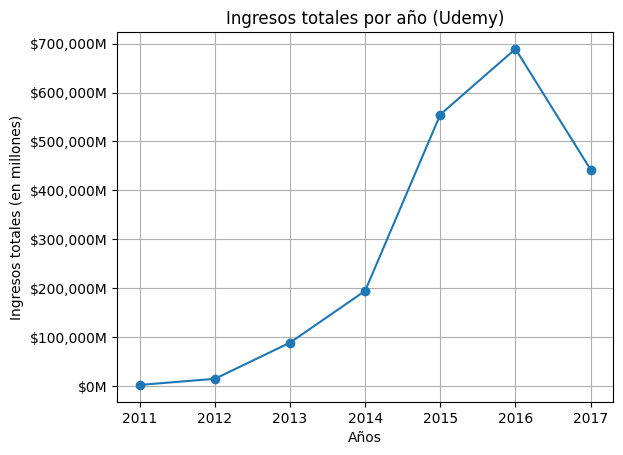

In [111]:
# Calcular los ingresos totales por año
income_by_year = (udemy['price'] * inscriptos_pagados).groupby(udemy['year']).sum()
formatted_income_by_year = income_by_year.apply(lambda x: '${:,.2f} millones'.format(x / 1000000))

# Graficar los ingresos totales por año en un gráfico de línea
income_by_year.plot(kind='line', marker='o')
plt.xlabel('Años')
plt.ylabel('Ingresos totales (en millones)')
plt.title('Ingresos totales por año (Udemy)')
plt.grid(True)

# Formatear el eje Y para mostrar los valores en millones
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x * 1e-6))
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()

In [112]:
#Mostramos los ingresos por año
print(formatted_income_by_year)

year
2011      $2,536.91 millones
2012     $15,016.90 millones
2013     $88,873.84 millones
2014    $194,769.56 millones
2015    $555,093.25 millones
2016    $689,140.53 millones
2017    $442,609.74 millones
Name: price, dtype: object


Observamos de forma general un incremento marcado y continuo en los ingresos totales desde el año 2011 hasta el 2016. A la vez que se aprecia una caída en los ingresos totales entre el año 2016 y el 2017. Para mayor precisión en la interpretación a continuación mostramos una tabla de cambio porcentual entre los años donde se especifica esta variabilidad. 

In [113]:
# Calcular los ingresos totales por año
income_by_year = (udemy['price'] * inscriptos_pagados).groupby(udemy['year']).sum()
formatted_income_by_year = income_by_year.apply(lambda x: '${:,.2f} millones'.format(x / 1000000))

# Calcular el cambio porcentual de los ingresos totales entre un año y el siguiente
income_change = income_by_year.pct_change() * 100

# Crear una tabla con los cambios porcentuales y redondear los porcentajes a dos decimales
income_change_table = pd.DataFrame({'Año': income_change.index[1:],
                                    'Cambio Porcentual': income_change.values[1:].round(2)})

# Agregar el símbolo de porcentaje al DataFrame
income_change_table['Cambio Porcentual'] = income_change_table['Cambio Porcentual'].map("{:.2f}%".format)

# Mostrar el DataFrame
income_change_table

,Año,Cambio Porcentual
0,2012,491.94%
1,2013,491.83%
2,2014,119.15%
3,2015,185.00%
4,2016,24.15%
5,2017,-35.77%


In [114]:
#Obtenemos el promedio histórico de cambio porcentual
mean_change = income_change.mean().round(2)
print("Promedio histórico de cambio porcentual de ingreso total:", mean_change)

Promedio histórico de cambio porcentual de ingreso total: 212.71


Existe una tendencia a la alta en la variabilidad porcentual del ingreso total entre los años con un promedio histórico destacable del 212.71 % y con una tendencia a la baja durante el último año registrado (2017). Udemy se funda en el 2010 por lo que la información obtenida es la esperada en un modelo de negocio en veloz expansión durante esos años y que está conquistando nuevas cuotas de mercado. Este crecimiento eventualmente debería moderarse una vez que la empresa haya cubierto zonas del mercado y su crecimiento se haya equilibrado por la expansión paralela de la competencia. 

Análisis de precios

 Cursos gratuitos vs. cursos pagados

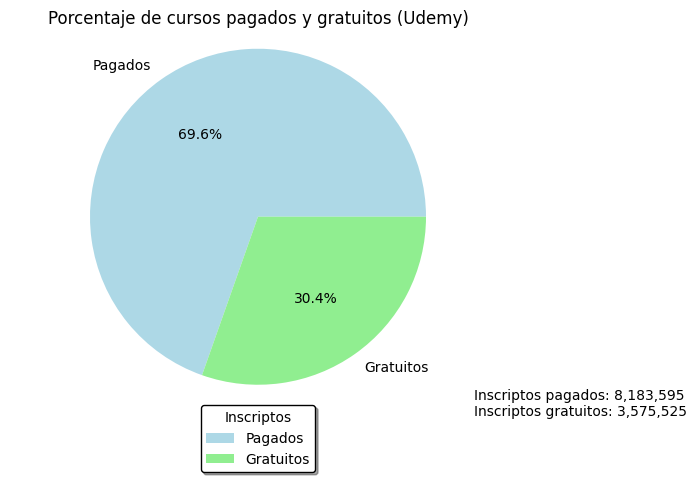

In [115]:
# Definir los datos y etiquetas para el gráfico de pie
datos = [inscriptos_pagados, inscriptos_gratuitos]
etiquetas = ['Pagados', 'Gratuitos']
colores = ['lightblue', 'lightgreen']

# Formatear los números de inscritos con separadores de miles
inscriptos_gratuitos_formateados = "{:,.0f}".format(inscriptos_gratuitos)
inscriptos_pagados_formateados = "{:,.0f}".format(inscriptos_pagados)

# Generar la leyenda
leyenda = f"Inscriptos pagados: {inscriptos_pagados_formateados}\nInscriptos gratuitos: {inscriptos_gratuitos_formateados}"

# Graficar el gráfico de pie con leyenda
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%')
plt.title('Porcentaje de cursos pagados y gratuitos (Udemy)')
plt.legend(title='Inscriptos', loc='center', bbox_to_anchor=(0.5, -0.1), shadow=True, edgecolor='black',
           facecolor='white', frameon=True, fancybox=True, borderaxespad=0.)
plt.gcf().text(0.85, 0.08, leyenda, fontsize=10)
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

Udemy, EDX y Coursera utilizan la estrategia "freemium". El término "freemium" es una combinación de las palabras "free" (gratis) y "premium" (de pago). Esta estrategia consiste en ofrecer un producto o servicio básico de forma gratuita para atraer a los clientes y luego ofrecer características adicionales o mejoradas a través de una versión de pago. En el contexto de los MOOC, las plataformas suelen ofrecer cursos gratuitos como una forma de atraer a los estudiantes y permitirles acceder al contenido y a las actividades básicas del curso sin costo. Esto les da a los estudiantes la oportunidad de evaluar la calidad del contenido y la experiencia de aprendizaje antes de decidir si desean pagar por características adicionales, como un certificado verificado, acceso a tutores o retroalimentación personalizada.

EDX utiliza la misma estrategia. En el dataset proporcinado la columna "price" tiene valores de este tipo: "FREE-Add a Verified Certificate for $49 USD". Los cursos se ofrecen gratis, pero la certificación hay que pagarla. Coursera aplica la misma estrategia. Aunque en este caso el dataset proporcionado no tiene suficientes datos que nos permitan llegar a esta conclusión. Sin embargo, una investigación propia sobre su modelo de negocio nos permite hacer esta afirmación. 

Pasemos ahora a confirmar si los cursos gratuitos ofrecidos por Udemy más demandados coinciden por área de conocimiento con los cursos más demandados de forma paga.


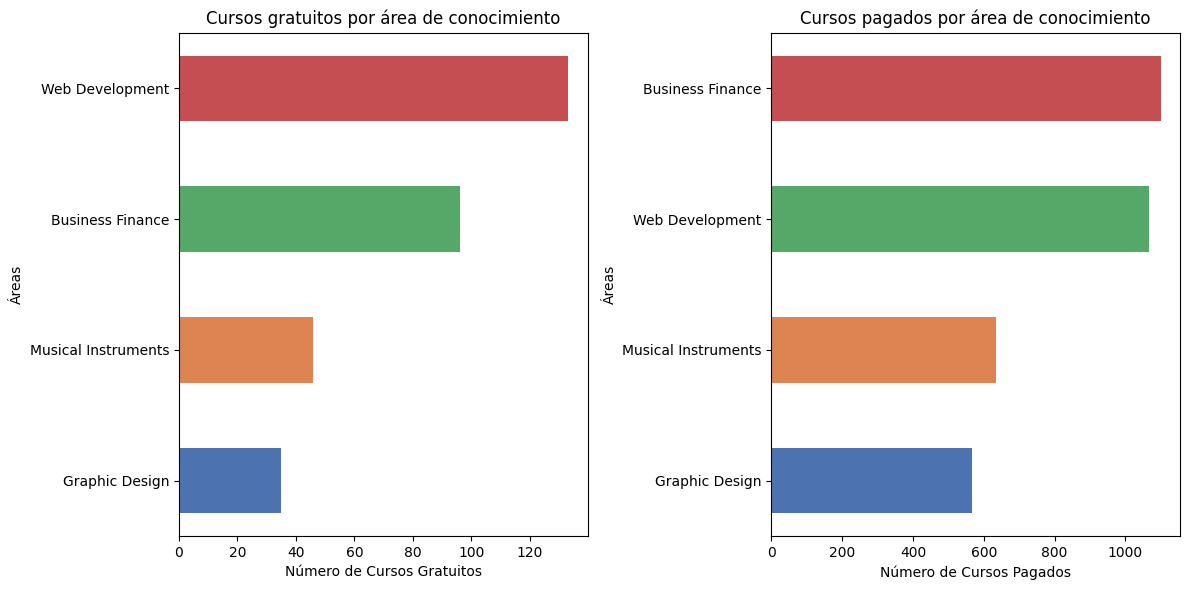

In [116]:
# Filtrar los cursos gratuitos
cursos_gratuitos = udemy[udemy['is_paid'] == False]

# Contar el número de cursos gratuitos por subject
conteo_subjects = cursos_gratuitos['subject'].value_counts()

# Ordenar los resultados de mayor a menor
conteo_subjects = conteo_subjects.sort_values(ascending=True)

# Crear una paleta de colores personalizada con tonos oscuros
paleta_colores = sns.color_palette("deep", len(conteo_subjects))

# Ordenar los colores en función del conteo de cursos gratuitos
colores_ordenados = [paleta_colores[i] for i in range(len(conteo_subjects))]

# Crear la figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los cursos gratuitos por área de conocimiento
axs[0].barh(conteo_subjects.index, conteo_subjects.values, color=colores_ordenados, height=0.5)
axs[0].set_xlabel('Número de Cursos Gratuitos')
axs[0].set_ylabel('Áreas')
axs[0].set_title('Cursos gratuitos por área de conocimiento')

# Filtrar los cursos pagados
cursos_pagados = udemy[udemy['is_paid'] == True]

# Contar el número de cursos pagados por subject
conteo_subjects_pagados = cursos_pagados['subject'].value_counts()

# Ordenar los resultados de mayor a menor
conteo_subjects_pagados = conteo_subjects_pagados.sort_values(ascending=True)

# Graficar los cursos pagados por área de conocimiento
axs[1].barh(conteo_subjects_pagados.index, conteo_subjects_pagados.values, color=colores_ordenados, height=0.5)
axs[1].set_xlabel('Número de Cursos Pagados')
axs[1].set_ylabel('Áreas')
axs[1].set_title('Cursos pagados por área de conocimiento')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Los cursos gratuitos ofrecidos por Udemy más demandados coinciden por área de conocimiento con los cursos más demandados de forma paga. Esto nos confirma que la selección de estos cursos gratuitos están acorde con la demanda y tienen como objetivo una estrategia de conversión del cliente: de pasar de cursos no pagos a cursos pagos a la vez que crear una base de suscriptores. La oferta de cursos gratuitos en esas áreas específicas también responde a que el promedio de precios más alto se encuentra en el sector de Web Development (77.03$) y Business Finance (68.55$), que ocupan el primero y segundo puesto en demanda. Después le sigue Graphic Design con 57.82 $ y Musical Instruments con 49.55$. 

In [117]:
#Promedio de los precios por área de conocimiento
promedio_precios = udemy.groupby('subject')['price'].mean()
promedio_precios = promedio_precios.sort_values(ascending=False)
print(promedio_precios)

subject
Web Development        77.033333
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Name: price, dtype: float64


Tasa de conversión de inscriptos gratuitos a inscriptos pagados

In [118]:
tasa_conversion = round((inscriptos_pagados / inscriptos_gratuitos) * 100, 2)
tasa_conversion

228.88

El resultado de la tasa de conversión parece exagerado porque es de un 288.88%. Pero ya sabemos que la cantidad de inscriptos pagados es más del doble que la cantidad de inscriptos gratuitos. Por lo tanto, podemos inferir que si de todos los alumnos que se inscriben hay más en cursos pagos significa que cada alumno al final termina comprando más de un curso. En otras palabras, debemos considerar que una persona que tomó un curso gratis puede inscribirse a varios cursos pagados. No tenemos los ids de los usuarios para verificar esta información, pero es probable afirmarlo con los datos que tenemos.

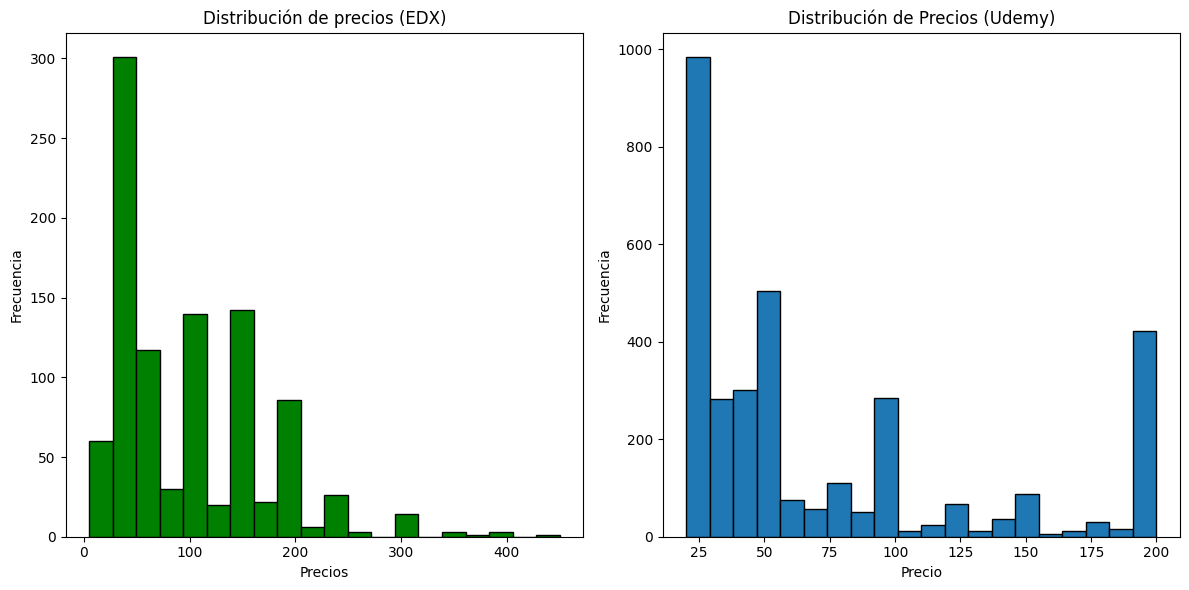

In [119]:
# Obtener los valores de la columna "_price_numeric"
precios_edx = edx['price_numeric']

# Crear el histograma de EDX
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(precios_edx, bins=20, edgecolor='black', color='green')
axs[0].set_title('Distribución de precios (EDX)')
axs[0].set_xlabel('Precios')
axs[0].set_ylabel('Frecuencia')

# Filtrar los cursos pagados de Udemy
cursos_pagados = udemy[udemy['is_paid'] == True]

# Obtener la columna de precios de Udemy
precios_udemy = cursos_pagados['price']

# Crear el histograma de Udemy
axs[1].hist(precios_udemy, bins=20, edgecolor='black')
axs[1].set_title('Distribución de Precios (Udemy)')
axs[1].set_xlabel('Precio')
axs[1].set_ylabel('Frecuencia')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

En el caso de EDX la distribución indica que la mayoría de precios está en el rango de 50$ y a medida que aumentan los precios su distribución disminuye visiblemente. En el caso de Udemy la mayoría de precios de los cursos pagados están entre los 20$ y 25$, es decir los precios más económicos. 
Udemy y EDX hacen "escalera de precios" o "pricing ladder" en inglés. Esta estrategia implica ofrecer inicialmente cursos a precios bajos o incluso gratuitos, con el objetivo de atraer a una gran base de estudiantes. A medida que los estudiantes se involucran y obtienen valor de los cursos iniciales, se les presenta la opción de acceder a cursos más avanzados o especializados a precios más altos. Comprobemos en el caso de Udemy el uso de esta estrategia en el siguiente gráfico:

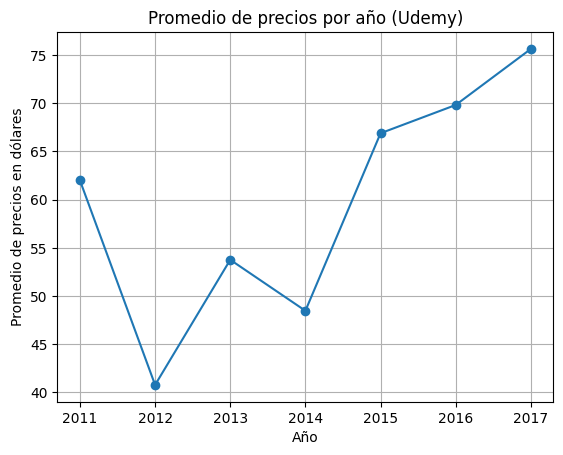

In [120]:
# Calcular el promedio de precios por año
promedio_precios_por_año = udemy.groupby('year')['price'].mean()

# Graficar los promedios de precios por año en un gráfico de línea
promedio_precios_por_año.plot(kind='line', marker='o')
plt.xlabel('Año')
plt.ylabel('Promedio de precios en dólares')
plt.title('Promedio de precios por año (Udemy)')
plt.grid(True)
plt.show()

Observamos cómo van regulando el promedio de precios. Es posible que una de las razones de la disminución del promedio del año 2011 al 2012 se deba a que querían aumentar la base subscriptores. Un ajuste similar se observa entre el año 2013 y 2014. Pero la tendencia histórica es claramente a la alta. La idea detrás de esta estrategia es convertir a los estudiantes en clientes recurrentes y aumentar gradualmente el valor y el precio de los cursos que se les ofrecen. Al proporcionar cursos iniciales a precios asequibles, se reduce la barrera de entrada y se genera confianza en la calidad y el valor de la plataforma. Una vez que los estudiantes están satisfechos con la experiencia y el contenido, están más dispuestos a invertir en cursos más caros y avanzados.

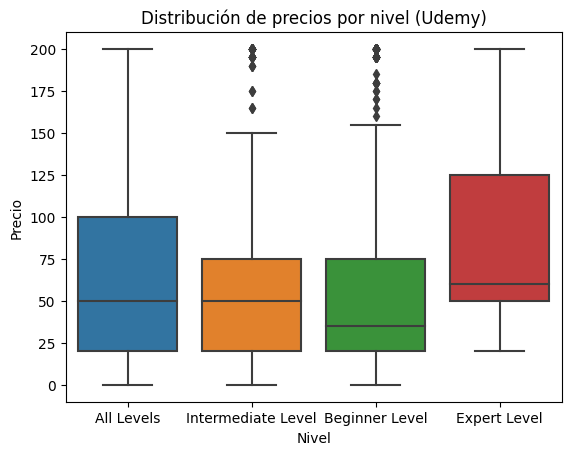

In [121]:
# Graficar un boxplot para cada nivel de cursos
sns.boxplot(x='level', y='price', data=udemy)
plt.xlabel('Nivel')
plt.ylabel('Precio')
plt.title('Distribución de precios por nivel (Udemy)')
plt.show()

Apreciamos que los cursos más avanzados son los que tienen un distribución de precios más alta que el resto de niveles. Pero ¿esto significa que los precios con la myor cantidad de inscriptos sean los más baratos?

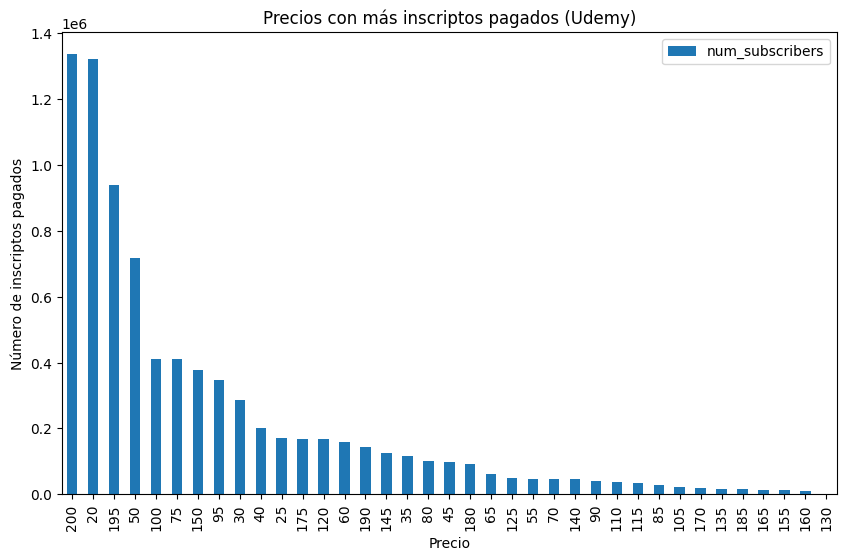

In [122]:
# Filtrar los cursos pagados
cursos_pagados = udemy[udemy['is_paid'] == True]

# Crear la tabla pivot con el precio y el número de inscriptos pagados
tabla_pivot = cursos_pagados.pivot_table(index='price', values='num_subscribers', aggfunc='sum')

# Ordenar los resultados en orden descendente
tabla_pivot = tabla_pivot.sort_values('num_subscribers', ascending=False)

# Obtener los precios ordenados de mayor a menor número de inscriptos pagados
precios_ordenados = tabla_pivot.index

# Graficar la tabla pivot en un gráfico de barras
tabla_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Precio')
plt.ylabel('Número de inscriptos pagados')
plt.title('Precios con más inscriptos pagados (Udemy)')
plt.xticks(range(len(precios_ordenados)), precios_ordenados)  # Personalizar las etiquetas del eje x
plt.show()

No hay una relación directa entre el precio y el número de cursos pagados. Es cierto que 200$ es el precio más alto y el que tiene mayor cantidad de cursos pagados. Pero 20$ es el siguiente precio y los cursos pagados son casi iguales que con 200$. Inferimos que hay otros factores aparte del precio que están determinando la cantidad de ventas de los cursos. 

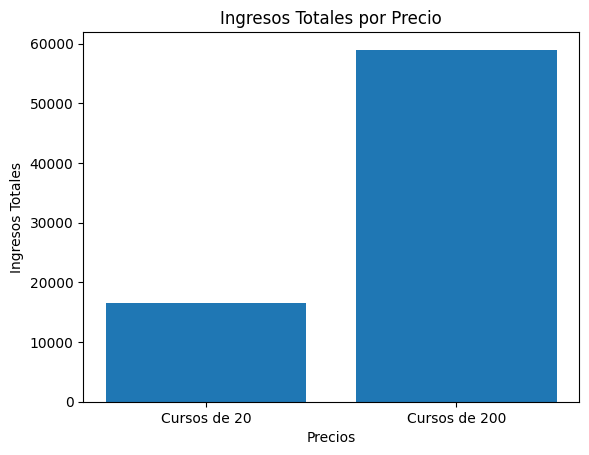

In [123]:
# Filtrar los cursos pagados con precio de 20
cursos_20_pagados = udemy[(udemy['price'] == 20) & (udemy['is_paid'] == True)]
ingresos_20 = cursos_20_pagados['price'].sum()

# Filtrar los cursos pagados con precio de 200
cursos_200_pagados = udemy[(udemy['price'] == 200) & (udemy['is_paid'] == True)]
ingresos_200 = cursos_200_pagados['price'].sum()

# Etiquetas para los datos
labels = ['Cursos de 20', 'Cursos de 200']
# Valores de ingresos
ingresos = [ingresos_20, ingresos_200]

# Graficar los datos
plt.bar(labels, ingresos)
plt.xlabel('Precios')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Precio')
plt.show()

El curso de 200$ genera un 255.42% más de ingresos que los cursos de 20%. 

In [124]:
diferencia_porcentaje = ((ingresos_200 - ingresos_20) / ingresos_20) * 100
diferencia_porcentaje = round(diferencia_porcentaje, 2)
diferencia_porcentaje

255.42

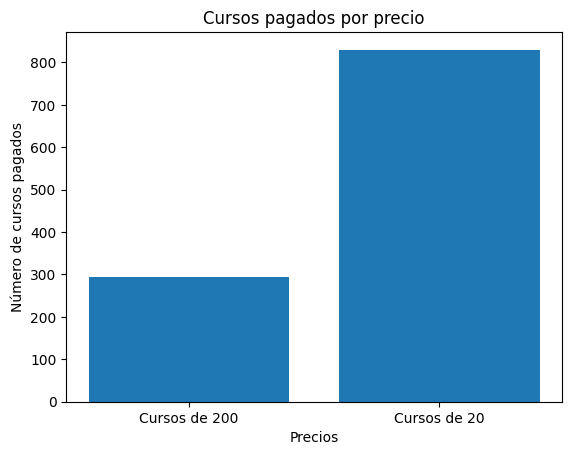

In [125]:
# Filtrar los cursos pagados con precio de 200
cursos_200_pagados = udemy[(udemy['price'] == 200) & (udemy['is_paid'] == True)]
num_cursos_200_pagados = len(cursos_200_pagados)
ingresos_200 = cursos_200_pagados['price'].sum()

# Filtrar los cursos pagados con precio de 20
cursos_20_pagados = udemy[(udemy['price'] == 20) & (udemy['is_paid'] == True)]
num_cursos_20_pagados = len(cursos_20_pagados)
ingresos_20 = cursos_20_pagados['price'].sum()

# Etiquetas para los datos
labels = ['Cursos de 200', 'Cursos de 20']
# Valores de cursos pagados
num_cursos_pagados = [num_cursos_200_pagados, num_cursos_20_pagados]
# Valores de ingresos
ingresos = [ingresos_200, ingresos_20]

# Graficar los datos
plt.bar(labels, num_cursos_pagados)
plt.xlabel('Precios')
plt.ylabel('Número de cursos pagados')
plt.title('Cursos pagados por precio')
plt.show()

El número de cursos pagados de 20$ supera en un 181.36% a los cursos pagados de 200$. 

In [126]:
porcentaje_superior = ((num_cursos_20_pagados - num_cursos_200_pagados) / num_cursos_200_pagados) * 100
print("El número de cursos pagados de 20 supera en un {:.2f}% a los cursos pagados de 200.".format(porcentaje_superior))

El número de cursos pagados de 20 supera en un 181.36% a los cursos pagados de 200.


Otro elemento importante es conocer a qué nivel de conocimientos van dirigidos los cursos. Comparemos Udemy con EDX: 

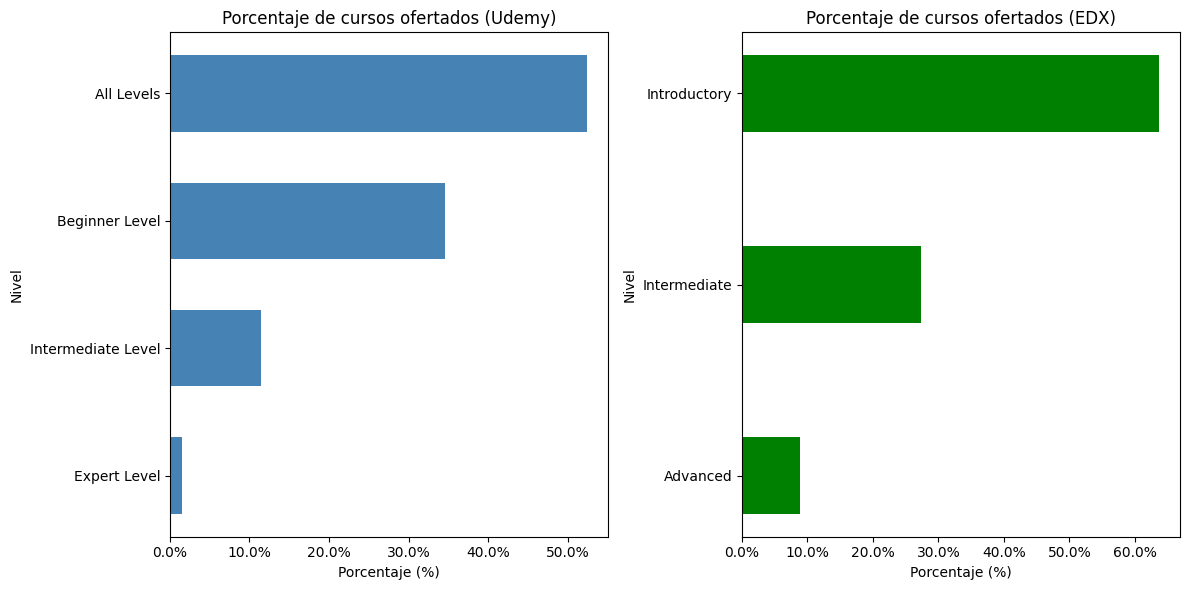

In [127]:
# Calcular el porcentaje de cursos ofertados por nivel en Udemy
udemy_counts = udemy['level'].value_counts()
udemy_percentages = (udemy_counts / udemy_counts.sum()) * 100

# Calcular el porcentaje de cursos ofertados por nivel en EDX
edx_counts = edx['Level'].value_counts()
edx_percentages = (edx_counts / edx_counts.sum()) * 100

# Ajustar el tamaño de la figura y crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de Udemy (izquierda)
udemy_sorted = udemy_percentages.sort_values(ascending=True)
axs[0].barh(udemy_sorted.index, udemy_sorted.values, color='#4682B4', height=0.6)
axs[0].set_xlabel('Porcentaje (%)')
axs[0].set_ylabel('Nivel')
axs[0].set_title('Porcentaje de cursos ofertados (Udemy)')
axs[0].xaxis.set_major_formatter('{:.1f}%'.format)  # Formato de porcentaje en el eje x

# Gráfico de EDX (derecha)
edx_sorted = edx_percentages.sort_values(ascending=True)
axs[1].barh(edx_sorted.index, edx_sorted.values, color='green', height=0.4)
axs[1].set_xlabel('Porcentaje (%)')
axs[1].set_ylabel('Nivel')
axs[1].set_title('Porcentaje de cursos ofertados (EDX)')
axs[1].xaxis.set_major_formatter('{:.1f}%'.format)  # Formato de porcentaje en el eje x

# Ajustar los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Como podemos notar, el mayor porcentaje de cursos ofertados pertenece al nivel "All_levels" en el caso de Udemy e "Introductory" en el de EDX. Al dirigirse a estudiantes de estas categorías, los MOOC pueden atraer a una audiencia más amplia y diversa. Esto significa que pueden llegar a estudiantes con diferentes niveles de conocimientos y experiencia, lo que amplía su base de usuarios potenciales. Asimismo, al ofrecer una amplia gama de cursos para diferentes niveles, puede aumentar la retención de estudiantes a largo plazo. Los estudiantes pueden comenzar con cursos introductorios y, a medida que adquieren confianza y habilidades, pueden avanzar a cursos más avanzados dentro de la misma plataforma. Esto fomenta la fidelidad del estudiante y la continuidad del aprendizaje, el resultado es un incremento de la retención de estudiantes y mayores ingresos. 

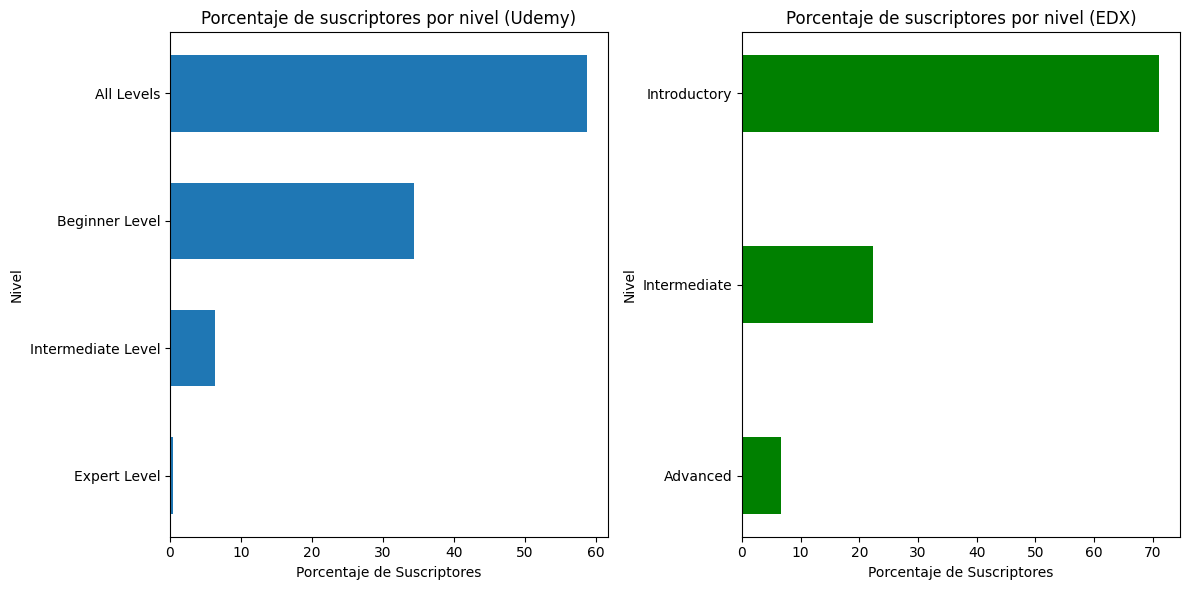

In [128]:
# Agrupar los datos por nivel y calcular el número total de suscriptores para cada nivel (Udemy)
suscriptores_por_nivel_udemy = udemy.groupby('level')['num_subscribers'].sum()

# Calcular el total de suscriptores (Udemy)
total_suscriptores_udemy = suscriptores_por_nivel_udemy.sum()

# Calcular el porcentaje de suscriptores por nivel (Udemy)
porcentaje_suscriptores_por_nivel_udemy = (suscriptores_por_nivel_udemy / total_suscriptores_udemy) * 100

# Ordenar los niveles por número de suscriptores en orden descendente (Udemy)
porcentaje_suscriptores_por_nivel_udemy = porcentaje_suscriptores_por_nivel_udemy.sort_values(ascending=True)

# Agrupar los datos por nivel y calcular el número total de suscriptores para cada nivel (EDX)
suscriptores_por_nivel_edx = edx.groupby('Level')['n_enrolled'].sum()

# Calcular el total de suscriptores (EDX)
total_suscriptores_edx = suscriptores_por_nivel_edx.sum()

# Calcular el porcentaje de suscriptores por nivel (EDX)
porcentaje_suscriptores_por_nivel_edx = (suscriptores_por_nivel_edx / total_suscriptores_edx) * 100

# Ordenar los niveles por número de suscriptores en orden descendente (EDX)
porcentaje_suscriptores_por_nivel_edx = porcentaje_suscriptores_por_nivel_edx.sort_values(ascending=True)

# Crear la figura con tamaño ajustado
plt.figure(figsize=(12, 6))

# Primer subplot para Udemy
plt.subplot(1, 2, 1)
plt.barh(porcentaje_suscriptores_por_nivel_udemy.index, porcentaje_suscriptores_por_nivel_udemy, height=0.6)

plt.xlabel('Porcentaje de Suscriptores')
plt.ylabel('Nivel')
plt.title('Porcentaje de suscriptores por nivel (Udemy)')

# Segundo subplot para EDX
plt.subplot(1, 2, 2)
plt.barh(porcentaje_suscriptores_por_nivel_edx.index, porcentaje_suscriptores_por_nivel_edx, color='green', height=0.4)

plt.xlabel('Porcentaje de Suscriptores')
plt.ylabel('Nivel')
plt.title('Porcentaje de suscriptores por nivel (EDX)')

# Ajustar los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En este par de gráficos podemos comprobar que la oferta de cursos en los niveles especificados anteriormente se corresponde con la demanda. Los niveles básicos siempre son los que tienen un mayor número de suscriptores. 

WordClouds

WordCloud de Udemy

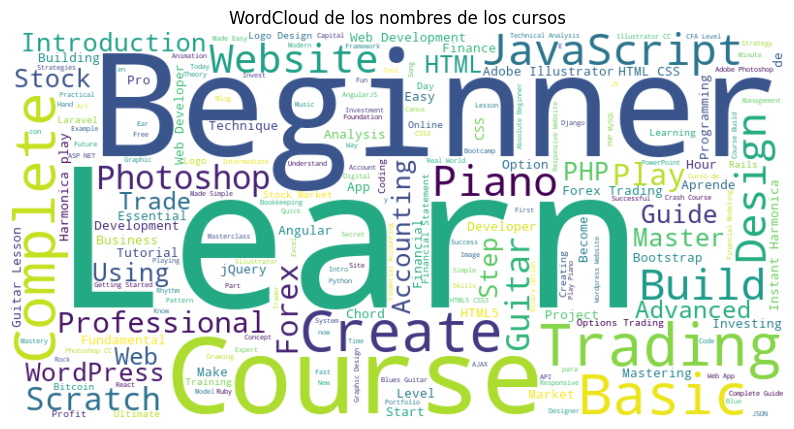

In [129]:
# Concatenar todos los nombres en una sola cadena de texto
text = ' '.join(udemy['course_title'].astype(str))

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Graficar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de los nombres de los cursos')

plt.show()

WordCloud de Coursera

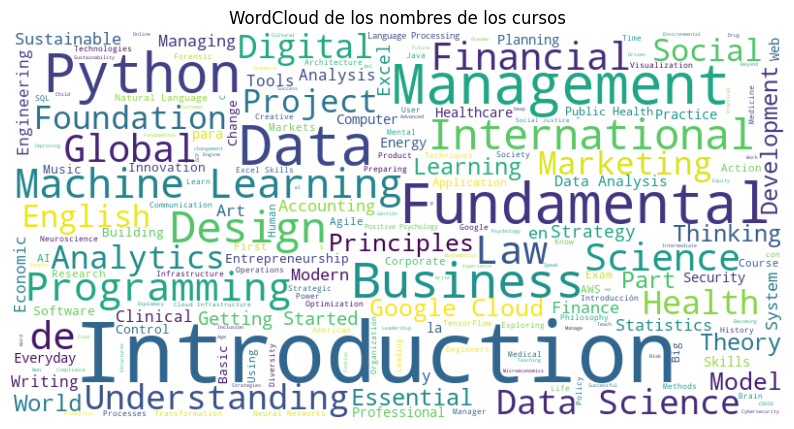

In [130]:
# Concatenar todos los nombres en una sola cadena de texto
text = ' '.join(c_courses['name'].astype(str))

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Graficar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de los nombres de los cursos')

plt.show()

WordCloud de EDX

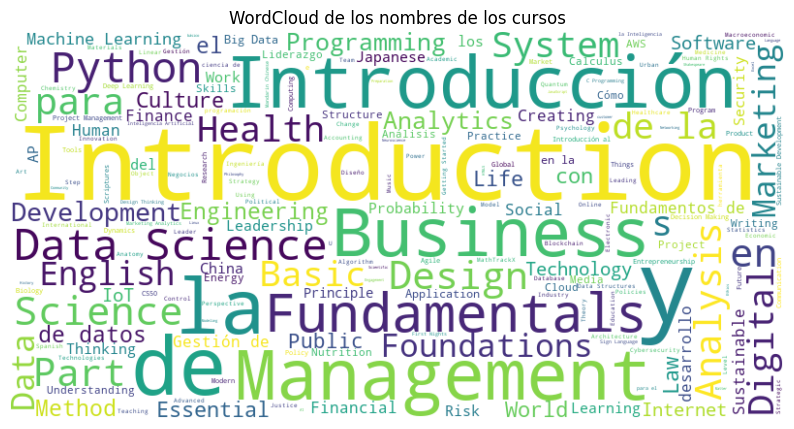

In [131]:
# Concatenar todos los nombres en una sola cadena de texto
text = ' '.join(edx['title'].astype(str))

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Graficar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de los nombres de los cursos')

plt.show()

En consonancia con lo que venimos explicando, cuando realizamos nubes de palabras a la columna 'course_title' del dataset de Udemy, a la columna "name" del dataset de Coursera (c_courses) y la columna "title" del dataset de EDX los resultados confirman lo que recién explicamos sobre la demanda por niveles. La palabra "Beginner" e "Introduction" son las que más se repiten. Son dos palabras que se adecuan al hecho de que la mayoría de cursos van dirigidos a personas de todos los niveles sin un backround previo o a personas con nivel de principiantes. Estas palabras son claves que deben considerarse para titular y promocionar cursos. 

Segmentación por idioma

In [132]:
#Transformamos el tipo de dato de la columna "n_enrolled" a entero
edx['n_enrolled'] = edx['n_enrolled'].fillna(0).astype(int)

In [133]:
# Agrupar por idioma y calcular la suma de n_enrolled
enrolled_by_language = edx.groupby('language')['n_enrolled'].sum().reset_index()

# Ordenar en orden descendente por n_enrolled
enrolled_by_language = enrolled_by_language.sort_values('n_enrolled', ascending=False)

# Obtener los 5 idiomas con mayor n_enrolled
top_5_languages = enrolled_by_language.head(5)

# Mostrar el resultado
print(top_5_languages)

   language  n_enrolled
1   English    41215599
2   Español     3704975
4  Italiano      281585
3  Français      161848
8       日本語       62757


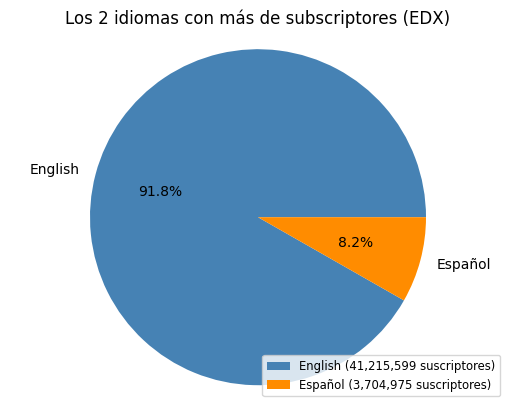

In [134]:
# Agrupar por idioma y calcular la suma de n_enrolled
enrolled_by_language = edx.groupby('language')['n_enrolled'].sum().reset_index()

# Ordenar en orden descendente por n_enrolled
enrolled_by_language = enrolled_by_language.sort_values('n_enrolled', ascending=False)

# Obtener el top 2 idiomas con mayor n_enrolled
top_2_languages = enrolled_by_language.head(2).copy()

# Calcular los porcentajes de n_enrolled
total_enrolled = top_2_languages['n_enrolled'].sum()
top_2_languages['percentage'] = (top_2_languages['n_enrolled'] / total_enrolled) * 100

# Configurar los colores
colors = ['steelblue', '#FF8C00']

# Crear el gráfico de pie
plt.pie(top_2_languages['percentage'], labels=top_2_languages['language'], colors=colors, autopct='%1.1f%%')

# Configurar el aspecto del gráfico
plt.axis('equal')  # Aspecto circular
plt.title('Los 2 idiomas con más de subscriptores (EDX)')

# Crear la leyenda con el número de suscriptores
legend_labels = [f"{lang} ({enrolled:,} suscriptores)" for lang, enrolled in zip(top_2_languages['language'], top_2_languages['n_enrolled'])]
plt.legend(legend_labels, loc='lower right', bbox_to_anchor=(1, 0), fontsize='small')

# Mostrar el gráfico
plt.show()

En el caso de EDX los dos idiomas con mayor número de suscriptores son el inglés y el español. Una empresa que quiera emerger en este rubro debe considerar que los cursos en inglés pueden llegar a una mayor audiencia en todo el mundo. Sin embargo, los 500 millones de hispanohablantes son un nicho de mercado que no puede ser descuidado. Va a depender de otros factores como el nivel de saturación de la competencia en uno y otro idioma el que llevará a la empresa a decidir sobre a qué público desea dirigirse. 

Segmentación por rating

Primero debemos unir los datasets c_courses y c_reviews porque por separado no es posible hacer segmentaciones por rating que tengan un valor en el análisis. También queremos agregar una nueva columna con los años extraídos de la columna date_reviews.

In [135]:
#Unimos los datasets Coursera_courses y Coursera_reviews

# Realizar el merge entre los DataFrames
coursera2 = pd.merge(c_courses, c_reviews, on='course_id', how='inner')

# Mostrar el DataFrame resultante
coursera2.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,year
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,2017
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,2015
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,2019
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,2015
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,2015


El rating proporciona a los usuarios una medida de la calidad y la satisfacción general de los cursos, lo que ayuda a los estudiantes a tomar decisiones informadas sobre qué cursos tomar.

In [136]:
# Convertir la columna "date_reviews" en formato de fecha
coursera2['date_reviews'] = pd.to_datetime(coursera2['date_reviews'], format='%b %d, %Y')

# Extraer los años y agregarlos como una nueva columna "year"
coursera2['year'] = coursera2['date_reviews'].dt.year

# Mostrar el dataset con la nueva columna "year"
coursera2.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,year
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,2017-03-18,1,2017
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,2015-11-09,1,2015
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,2019-04-15,1,2019
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,2015-09-25,1,2015
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,2015-12-12,1,2015


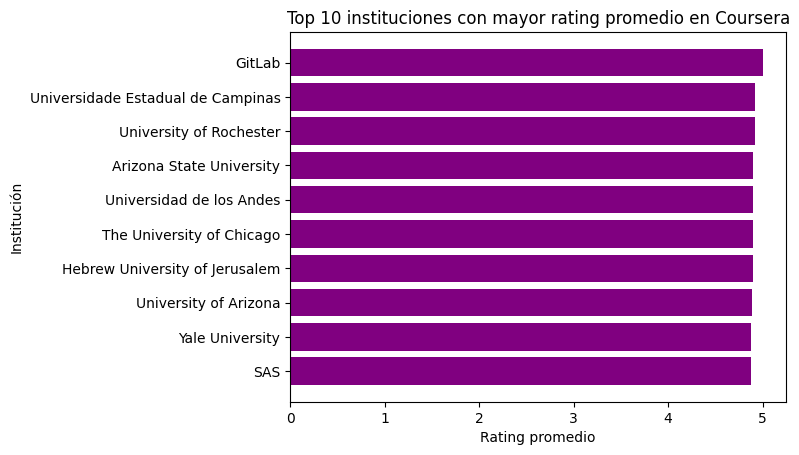

In [137]:

# Agrupar por institución y calcular el promedio de los ratings
rating_promedio_por_institucion = coursera2.groupby('institution')['rating'].mean()

# Ordenar de forma descendente y obtener el top 5
top_10_instituciones = rating_promedio_por_institucion.nlargest(10).sort_values(ascending=True)

# Configurar el gráfico de barras horizontal
plt.barh(top_10_instituciones.index, top_10_instituciones.values, color='purple')

# Configurar etiquetas y título del gráfico
plt.xlabel('Rating promedio')
plt.ylabel('Institución')
plt.title('Top 10 instituciones con mayor rating promedio en Coursera')

# Mostrar el gráfico
plt.show()

La asociación entre Coursera e instituciones puede dar resultados óptimos en cuanto a la calidad de los cursos. En el gráfico observamos que de las 10 instituciones con las mejores puntuaciones por los usuarios 8 son universidades y dos son organizaciones dedidacadas a ofrecer servicios de software. Aquí tenemos una diferencia entre el modelo de negocio de Coursera y EDX frente al de Udemy . 

Mientras Coursera y EDX se enfocan más en ofrecer cursos en colaboración con instituciones educativas establecidas, Udemy se destaca por su enfoque de aprendizaje en línea basado en la comunidad, donde cualquier persona puede convertirse en instructor y compartir sus conocimientos y habilidades.

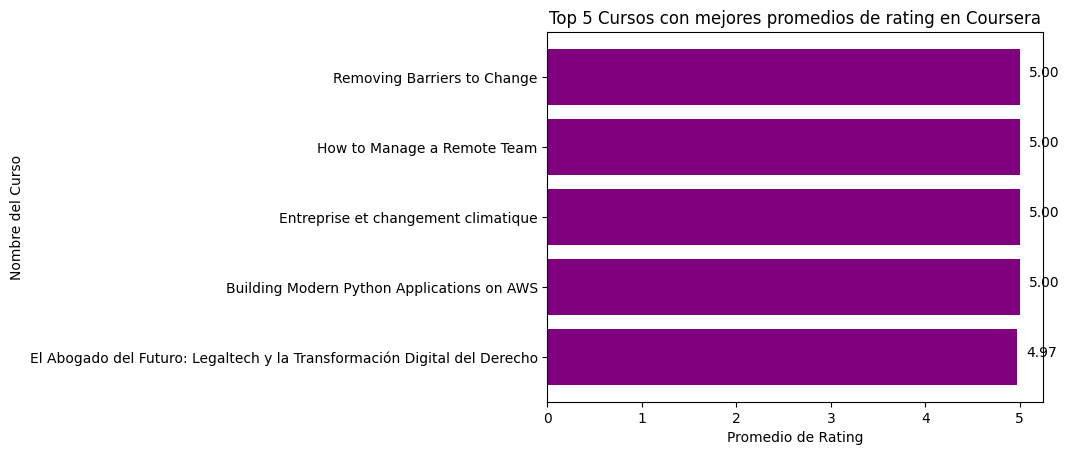

In [138]:
rating_promedio_por_curso = coursera2.groupby('name')['rating'].mean()
top_cursos_nombres = rating_promedio_por_curso.nlargest(5)

# Ordenar los datos de mayor a menor
top_cursos_nombres = top_cursos_nombres.sort_values(ascending=True)

# Configurar el gráfico de barras horizontal
plt.barh(top_cursos_nombres.index, top_cursos_nombres.values, color='purple')

# Agregar etiquetas de promedio de rating en las barras
for i, v in enumerate(top_cursos_nombres.values):
    plt.text(v + 0.1, i, f'{v:.2f}', color='black')

# Configurar etiquetas y título del gráfico
plt.xlabel('Promedio de Rating')
plt.ylabel('Nombre del Curso')
plt.title('Top 5 Cursos con mejores promedios de rating en Coursera')

# Mostrar el gráfico
plt.show()

Los cursos con mejores ratings y reseñas tienden a ganar más visibilidad y atractivo entre los estudiantes, lo que puede aumentar su demanda y popularidad en la plataforma. Notemos que entre los 5 mejores cursos con promedios vuelven a aparecer cursos asociados a la tecnología y a las finanzas. 

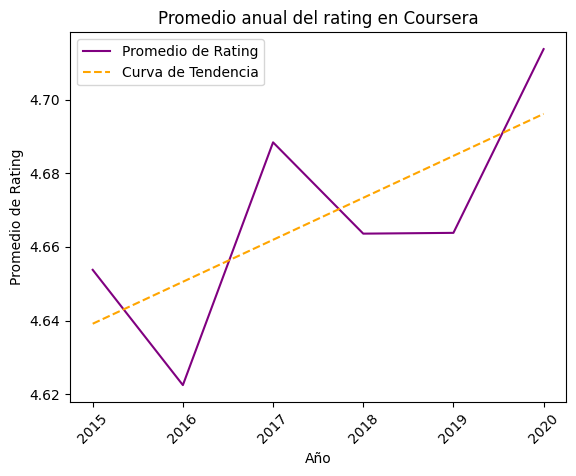

In [139]:
# Calcular el promedio anual del rating
promedio_rating_anual = coursera2.groupby('year')['rating'].mean()

# Configurar el gráfico de línea
plt.plot(promedio_rating_anual.index, promedio_rating_anual.values, color='purple', label='Promedio de Rating')

# Ajustar un polinomio de grado 1 (lineal)
fit = np.polyfit(promedio_rating_anual.index, promedio_rating_anual.values, 1)
fit_fn = np.poly1d(fit)

# Agregar la curva de tendencia al gráfico
plt.plot(promedio_rating_anual.index, fit_fn(promedio_rating_anual.index), color='orange', linestyle='--', label='Curva de Tendencia')

# Configurar etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Promedio de Rating')
plt.title('Promedio anual del rating en Coursera')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

El gráfico demuestra una constante mejora en el rating por año de los cursos. Es lógico: mientras más cursos haya con promedios de rating alto más actractivos resultan para los estudiantes y más probabilidades de ingresos. El promedio histórico de 4.69 expresa muy bien esta estrategia. 

In [140]:
promedio_rating = coursera2['rating'].mean()
print(f"El promedio del rating en el dataset coursera2 es: {promedio_rating:.2f}")

El promedio del rating en el dataset coursera2 es: 4.69


In [141]:
#Promedios del rating de cada año

promedio_rating_anual = coursera2.groupby('year')['rating'].mean()
promedio_rating_anual_df = pd.DataFrame({'Promedio de Rating': promedio_rating_anual})
promedio_rating_anual_df.reset_index(inplace=True)

print(promedio_rating_anual_df)

   year  Promedio de Rating
0  2015            4.653766
1  2016            4.622462
2  2017            4.688389
3  2018            4.663594
4  2019            4.663807
5  2020            4.713712


In [142]:
# Verificar la cantidad de duplicados en el dataset c_reviews
duplicados = c_reviews.duplicated().sum()

print("Número de duplicados en el dataset c_reviews:", duplicados)

Número de duplicados en el dataset c_reviews: 0


Exportamos los datasets finales

In [143]:
# Eliminar las columnas del dataset udemy
columnas_eliminar = ['published_timestamp', 'url', 'num_reviews', 'num_lectures']
udemy_nuevo = udemy.drop(columnas_eliminar, axis=1)

# Exportar el nuevo DataFrame como CSV
udemy_nuevo.to_csv('udemy_nuevo.csv', index=False)

In [144]:
#Eliminar las columnas del dataset edx
columnas_eliminar = ['price', 'course_description', 'course_url', 'course_syllabus', 'course_syllabus', 'instructors', 'summary']
edx_nuevo = edx.drop(columnas_eliminar, axis=1)

# Exportar el nuevo DataFrame como CSV
edx_nuevo.to_csv('edx_nuevo.csv', index=False)

In [145]:
#Unimos los datasets Coursera_courses y Coursera_reviews

# Realizar el merge entre los DataFrames
coursera2 = pd.merge(c_courses, c_reviews, on='course_id', how='inner')

columnas_eliminar = ['reviewers']
coursera2 = coursera2.drop(columnas_eliminar, axis=1)
# Mostrar el DataFrame resultante
coursera2.head()

,name,institution,course_url,course_id,reviews,date_reviews,rating,year
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,2017-03-18,1,2017
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,2015-11-09,1,2015
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",2019-04-15,1,2019
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,2015-09-25,1,2015
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",2015-12-12,1,2015


In [146]:
# Exportar el nuevo DataFrame como CSV
coursera2.to_csv('coursera2.csv', index=False)

## Resultados
* Comprobación del uso de las estrategias *freemium* y *pricing ladder* en los MOOCs como instrumento de conversión de clientes.
* Más del 90% de cursos son enseñados en idioma inglés.
* Promedio histórico del rating en Coursera de 4.69 en una escala de 1 a 5. 
* Tasa de conversión de Udemy del 2011 al 2017 de 228.88% explicada. 
* Distribución de precios similar entre Udemy y edX.
* No existe una relación directa entre el precio y el número de cursos pagados.
* Los cursos ofertados en niveles aptos para todo público representan más del 50% tanto para Udemy como para edX.
* La palabra "Beginner" e "Introduction" son las que más se repiten en los títulos de los cursos.
* Los cursos de nivel avanzado son los más caros con una mediana superior a los 50$
* Los cursos gratuitos y pagados ofertados coinciden en áreas de conocimiento por volumen de demanda. 
* Tasa de conversión de Udemy del 2011 al 2017 de 228.88% explicada 